In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
cc=pd.read_csv(r'file:///F:\data\creditcard.csv')
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
cc.shape

(284807, 31)

In [4]:
#The classes are heavily skewed we need to solve this issue later.
print('No Frauds',round(cc['Class'].value_counts()[0]/len(cc)*100,2),'% of the dataset')
print('Frauds',round(cc['Class'].value_counts()[1]/len(cc)*100,2),'% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n(0: No Fraud || 1:Fraud)')

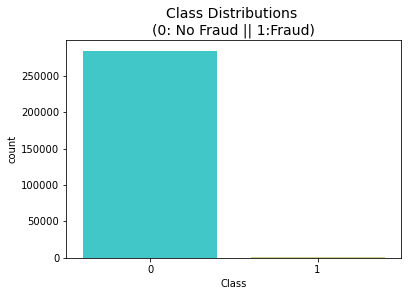

In [5]:
import seaborn as sns
sns.countplot('Class',data=cc,palette='rainbow')
plt.title('Class Distributions \n(0: No Fraud || 1:Fraud)',fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


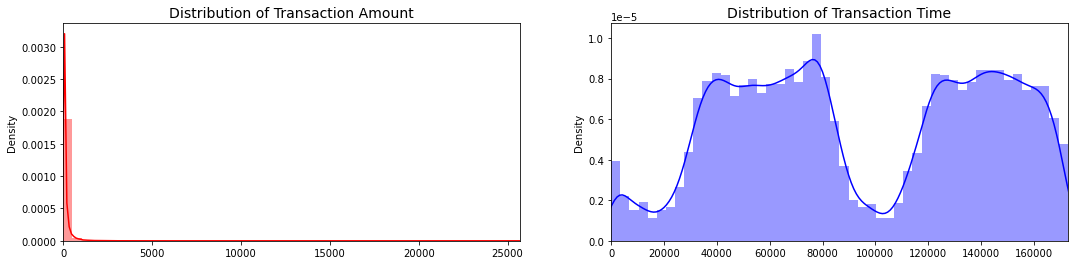

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = cc['Amount'].values
time_val = cc['Time'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. 

On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

Why do we create a sub-Sample?

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result 
 (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

In [7]:
#Since most of our data has already been scaled we should scale the columns that are left to scale

from sklearn.preprocessing import RobustScaler

#RobustScaler is leass prone to outliers.
rob_scaler=RobustScaler()
cc['scaled_amount']=rob_scaler.fit_transform(cc['Amount'].values.reshape(-1,1))
cc['scaled_time']=rob_scaler.fit_transform(cc['Time'].values.reshape(-1,1))

cc.drop(['Time','Amount'],axis=1,inplace=True)


In [8]:
scaled_amount=cc['scaled_amount']
scaled_time=cc['scaled_time']

cc.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)
cc.insert(0,'scaled_amount',scaled_amount)
cc.insert(0,'scaled_time',scaled_time)

#Amount and Time are scaled
cc.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
x=cc.drop('Class',axis=1)
y=cc['Class']

In [11]:
from sklearn.model_selection import KFold,StratifiedKFold
sss=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

In [12]:
for train_index,test_index in sss.split(x,y):
    #print("Train:",train_index,"Test:",test_index)
    original_xtrain,original_xtest=x.iloc[train_index],x.iloc[test_index]
    original_ytrain,original_ytest=y.iloc[train_index],y.iloc[test_index]

In [13]:
#Shuffling the data before creating the subsamples

cc=cc.sample(frac=1)

#amount of fraud classes 492 rows.

fraud_cc=cc.loc[cc['Class']==1]
non_fraud_cc=cc.loc[cc['Class']==0][:492]

normal_distributed_cc=pd.concat([fraud_cc,non_fraud_cc])

#Shuffle dataframe rows
new_cc=normal_distributed_cc.sample(frac=1,random_state=42)

new_cc.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
146498,0.035715,-0.237546,-1.222383,1.338253,-0.049203,-2.966737,0.968103,-0.655325,1.227215,-0.035659,...,0.344740,-0.382188,-0.858226,-0.225650,-1.032941,0.180295,0.427720,0.540946,0.327484,0
149600,0.080617,3.342695,-5.100256,3.633442,-3.843919,0.183208,-1.183997,1.602139,-3.005953,-8.645038,...,-2.806302,8.280439,-2.797150,1.090707,-0.159260,0.532156,-0.497126,0.943622,0.553581,1
68062,-0.374534,0.139733,-2.393836,0.259803,1.340769,-2.240735,-2.775188,-0.337299,-1.933687,1.655061,...,-0.318435,-0.125882,-0.171583,-0.117005,0.488123,0.377005,-0.277121,0.186498,0.004029,0
144108,0.013804,4.030182,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,...,-0.178534,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,1
9487,-0.829650,-0.293440,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1


In [14]:
print('Distribution of the classes in the subsample dataset')
print(new_cc['Class'].value_counts()/len(new_cc))

Distribution of the classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


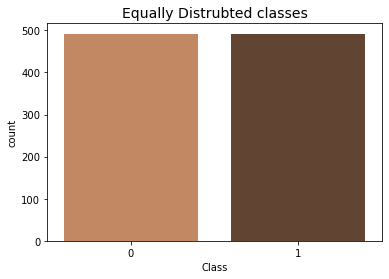

In [15]:
sns.countplot('Class',data=new_cc,palette="copper_r")
plt.title('Equally Distrubted classes',fontsize=14)
plt.show()

Correlation Matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.
Summary and Explanation:

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
    
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

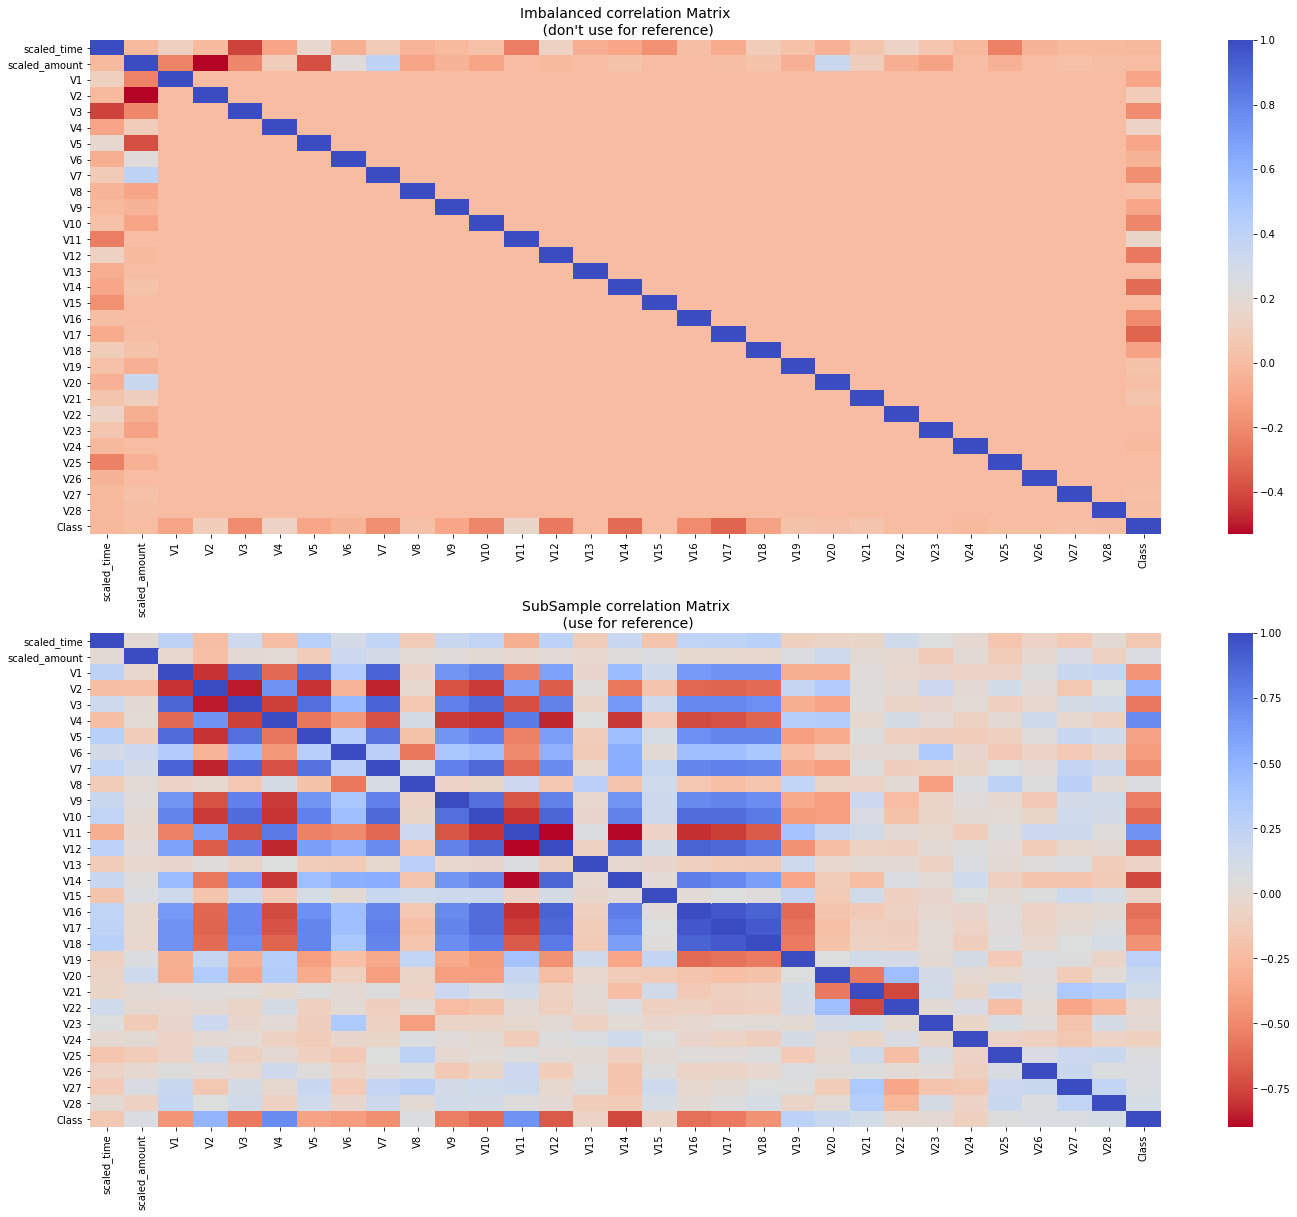

In [16]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(24,20))

corr=cc.corr()
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':20},ax=ax1)
ax1.set_title("Imbalanced correlation Matrix\n (don't use for reference)",fontsize=14)

sub_sample_corr=new_cc.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r', annot_kws={'size':20},ax=ax2)
ax2.set_title("SubSample correlation Matrix\n (use for reference)",fontsize=14)

plt.show()


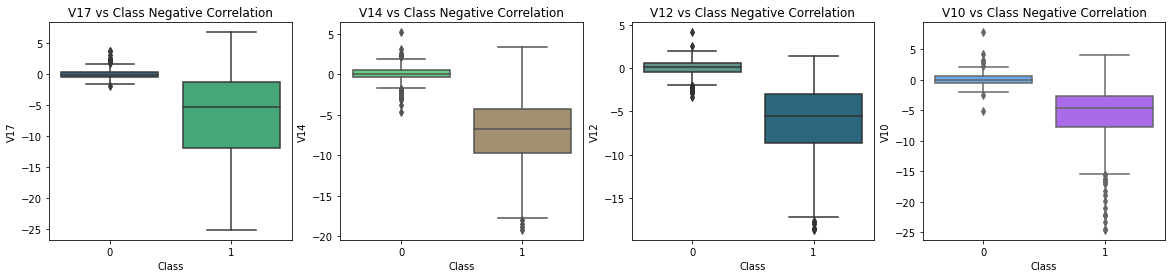

In [17]:
f,axes=plt.subplots(ncols=4,figsize=(20,4))

#Negative correlation with our class(The lower our feature value the more likely it will be a fraud)

sns.boxplot(x="Class",y="V17",data=new_cc,palette="viridis",ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class",y="V14",data=new_cc,palette="terrain",ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class",y="V12",data=new_cc,palette="crest",ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class",y="V10",data=new_cc,palette="cool",ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

Anomaly Detection:


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.
Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).
Outlier Removal Tradeoff:


We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.

The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

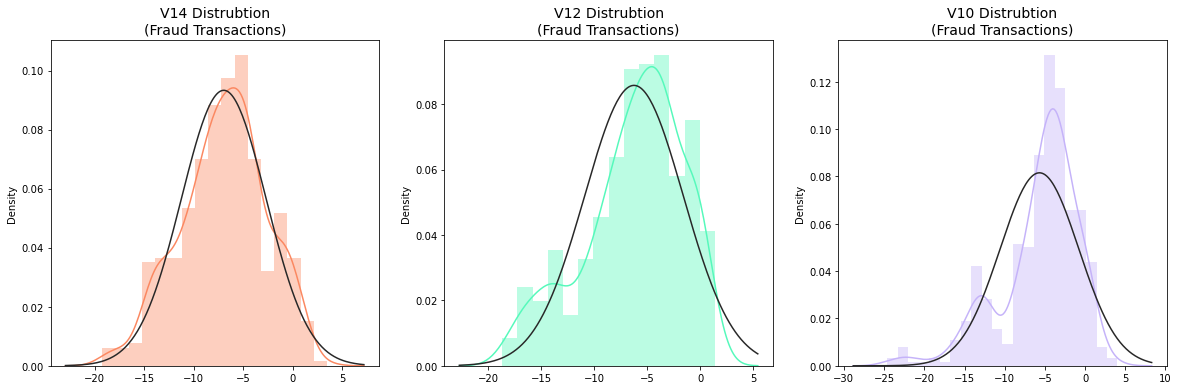

In [18]:
from scipy.stats import norm

f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

v14_fraud_dist=new_cc['V14'].loc[new_cc['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm,color='#FB8861')
ax1.set_title('V14 Distrubtion\n(Fraud Transactions)',fontsize=14)
                
v12_fraud_dist=new_cc['V12'].loc[new_cc['Class']==1].values
sns.distplot(v12_fraud_dist,ax=ax2,fit=norm,color='#56F9BB')
ax2.set_title('V12 Distrubtion\n(Fraud Transactions)',fontsize=14)
 
v10_fraud_dist=new_cc['V10'].loc[new_cc['Class']==1].values
sns.distplot(v10_fraud_dist,ax=ax3,fit=norm,color='#C5B3F9')
ax3.set_title('V10 Distrubtion\n(Fraud Transactions)',fontsize=14)
        
plt.show()
      

In [19]:
#V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_cc['V14'].loc[new_cc['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

Quartile 25: -9.69272296475 | Quartile 75: -4.2828208495
iqr: 5.40990211525


In [20]:
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

Cut Off: 8.114853172875002
V14 Lower: -17.807576137625002
V14 Upper: 3.8320323233750013


In [21]:
outliers=[x for x in v14_fraud if x<v14_lower or x >v14_upper]
print('Feature V14 Outliers for Fraud cases:{}'.format(len(outliers)))
print('v14 outliers:{}'.format(outliers))

Feature V14 Outliers for Fraud cases:4
v14 outliers:[-18.04999769, -18.49377336, -19.21432549, -18.82208674]


In [22]:
new_cc=new_cc.drop(new_cc[(new_cc['V14']>v14_upper)|(new_cc['V14']<v14_lower)].index)

In [23]:
v12_fraud = new_cc['V12'].loc[new_cc['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))


outliers=[x for x in v12_fraud if x<v12_lower or x >v12_upper]
print('Feature V12 Outliers for Fraud cases:{}'.format(len(outliers)))
print('v12 outliers:{}'.format(outliers))

new_cc=new_cc.drop(new_cc[(new_cc['V12']>v12_upper)|(new_cc['V12']<v12_lower)].index)


Quartile 25: -8.6730332045 | Quartile 75: -2.89303056825
iqr: 5.78000263625
Cut Off: 8.670003954375
V12 Lower: -17.343037158875
V12 Upper: 5.776973386125
Feature V12 Outliers for Fraud cases:4
v12 outliers:[-18.43113103, -18.68371463, -18.55369701, -18.04759657]


In [24]:
v10_fraud = new_cc['V10'].loc[new_cc['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))


outliers=[x for x in v10_fraud if x<v10_lower or x >v10_upper]
print('Feature V10 Outliers for Fraud cases:{}'.format(len(outliers)))
print('v10 outliers:{}'.format(outliers))

new_cc=new_cc.drop(new_cc[(new_cc['V10']>v10_upper)|(new_cc['V10']<v10_lower)].index)

Quartile 25: -7.466658536 | Quartile 75: -2.89303056825
iqr: 4.573627967749999
Cut Off: 6.860441951624999
V10 Lower: -14.327100487625
V10 Upper: 3.967411383374999
Feature V10 Outliers for Fraud cases:31
v10 outliers:[-19.83614885, -20.94919155, -16.60119697, -15.56379134, -24.40318497, -15.23996196, -14.92465477, -15.12375218, 4.031435051, -18.91324333, -16.64962816, -22.18708856, -14.55715905, -16.30353766, -15.23996196, -14.92465477, -15.56379134, -24.58826244, -22.18708856, -16.25561175, -16.74604411, -15.23183337, -18.27116817, -22.18708856, -15.12416281, -14.53316169, -22.18708856, -17.14151364, -14.67647025, -23.22825484, -15.34609885]


Text(0, -12, 'Fewer extreme \n outliers')

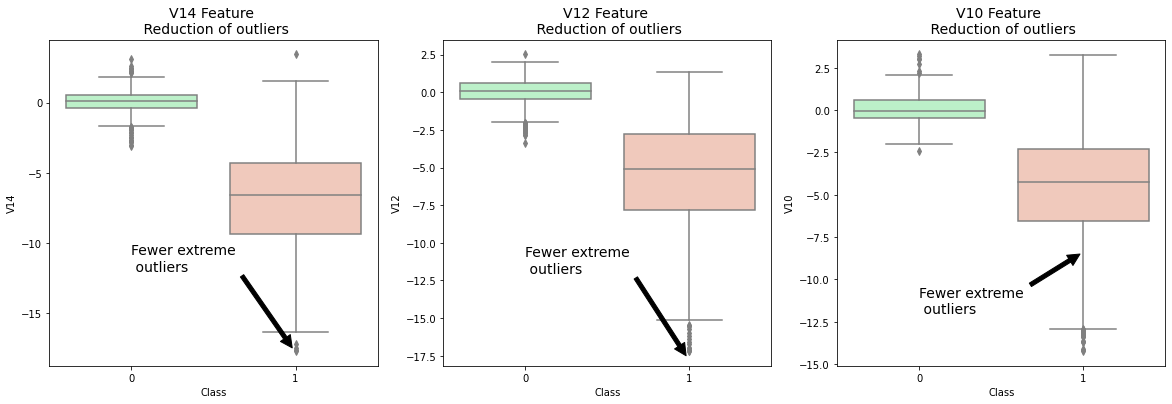

In [25]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_cc,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

#Feature 12
sns.boxplot(x="Class",y="V12",data=new_cc,ax=ax2,palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers",fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

#Feature 10
sns.boxplot(x="Class",y="V10",data=new_cc,ax=ax3,palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers",fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, -8.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state =0)



In [28]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
result=model.fit(x_train, y_train)


C:\Users\www\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
from sklearn import metrics
pred =model.predict(x_test)
#Print the prediction accuracy
print(metrics.accuracy_score(y_test,pred))

0.9991467936293924


In [31]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1,
                               random_state=20,max_features="auto",
                               max_leaf_nodes=30)
model_rf.fit(x_train,y_train)

#make Predictions
prediction =model.predict(x_test)
#Print the prediction accuracy
print(metrics.accuracy_score(y_test,prediction))

0.9991467936293924


In [37]:
from sklearn.svm import SVC
svm_model=SVC()
from sklearn import metrics
svc=SVC()#Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score:
0.999389062104997


In [38]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [39]:
from sklearn.model_selection import GridSearchCV

model_svm=GridSearchCV(svm_model,tuned_parameters,cv=20,scoring='accuracy')

In [ ]:
model_svm.fit(x_train,y_train)
print(model_svm.best_score_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    tr_score = knn.score(x_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(x_test, y_test)
    test_score.append(te_score)

In [ ]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))